# pypdb advanced demos

This is a set of basic examples of the ways that algorithmic querying with pypdb can be used to perform advanced search tasks. Most of these examples combine multiple functions in the API in order to perform searches based on the results of previous searches

### Preamble

In [1]:
%pylab inline
from IPython.display import HTML

# Import from local directory
import sys
sys.path.insert(0, '../pypdb')
from pypdb import *

## Import from installed package
# from pypdb import *

import pprint

Populating the interactive namespace from numpy and matplotlib


### Look up structural information about the results of a BLAST search

In [4]:
# Search for PDB IDs related to CRISPR
crispr_query = Query('crispr').search()

# Run BLAST on the top result
top_result = crispr_results[0]
blast_hits = get_blast2(top_result)


for item in blast_hits[0]:
    pdbdesc = describe_pdb(item)
    print(pdbdesc['title'])

Structure of Thermus Thermophilus Cse3 bound to an RNA representing a product complex
Structure of Thermus Thermophilus Cse3 bound to an RNA representing a pre-cleavage complex
Structure of Thermus Thermophilus Cse3 bound to an RNA representing a product mimic complex
Structure A of CRISPR endoribonuclease Cse3 bound to 19 nt RNA
Structure B of CRISPR endoribonuclease Cse3 bound to 19 nt RNA
Structure of CRISPR endoribonuclease Cse3 bound to 20 nt RNA
Crystal structure of a CRISPR-associated protein from thermus thermophilus
Crystal structure of E. coli Cascade bound to a PAM-containing dsDNA target at 2.45 angstrom resolution.
Crystal structure of E. coli Cascade bound to a PAM-containing dsDNA target (32-nt spacer) at 3.20 angstrom resolution.
The Type IE CRISPR Cascade complex from E. coli, with two assemblies in the asymmetric unit arranged back-to-back
Crystal structure of the E. coli CRISPR RNA-guided surveillance complex, Cascade
Crystal structure of a CRISPR RNA-guided surveill

### Estimate total number of depositions versus time

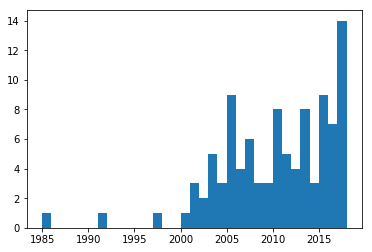

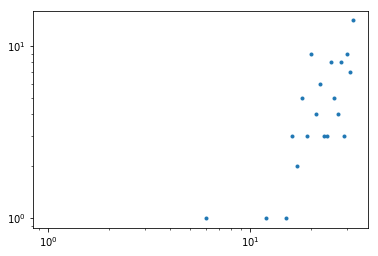

In [4]:
# Choose a random sample because we don't want to call the database for every single entry
from random import choice

all_pdbs = get_all()

all_dates = list()

for ii in range(100):
    pdb_desc = describe_pdb( choice(all_pdbs) )
    depdate = (pdb_desc['deposition_date'])
    all_dates.append( int(depdate[:4]) )
    
all_dates = array(all_dates)

figure()
subs_v_time = hist(all_dates, max(all_dates)-min(all_dates))
show(subs_v_time)   

# Show power-law scaling
figure()
subs_v_time_loglog = loglog(subs_v_time[0],'.')
show(subs_v_time_loglog)

### Graph new CRISPR entries versus time

In [11]:
help(find_dates)

Help on function find_dates in module pypdb:

find_dates(search_term, **kwargs)
    Return an ordered list of the PDB submission dates returned by a
    keyword search of the RCSB PDB. This can be used to assess the
    popularity of a gievne keyword or topic
    
    Parameters
    ----------
    
    search_term : str
        The search keyword
    
    max_results : int
        The maximum number of results to return
    
    Returns
    -------
    
    all_dates : list of str
        A list of calendar strings associated with the search term, these can
        be converted directly into time or datetime objects



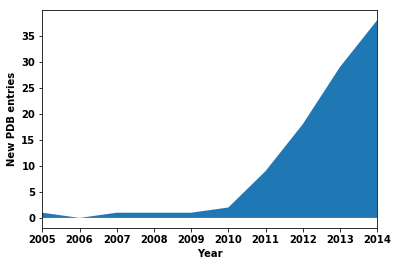

In [15]:
# Perform search
all_dates = find_dates('crispr', max_results=100)
all_dates = array(all_dates)
all_dates = array([int(depdate[:4]) for depdate in all_dates])
subs_v_time = histogram(all_dates, max(all_dates)-min(all_dates))
dates, num_entries = subs_v_time[1][1:], subs_v_time[0]
popgraph = fill_between(dates, 0, num_entries)

# Formatting the plots
xlim([dates[0], dates[-1]] )
gca().xaxis.set_major_formatter(FormatStrFormatter('%d'))
xticks(fontweight='bold')
yticks(fontweight='bold')
xlabel('Year',fontweight='bold')
ylabel('New PDB entries',fontweight='bold')
show(popgraph)

### Sweep RMSD matching parameters

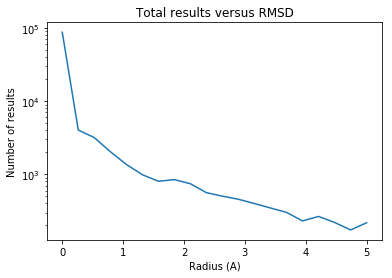

In [21]:
point_group = 'C1'
max_distance = 5.0
npts = 20

dist_vals = linspace(0.0, max_distance, npts)
dx = dist_vals[1]-dist_vals[0]

all_ids = []

for dist_val in dist_vals:
    idlist = do_protsym_search(point_group, min_rmsd=dist_val, max_rmsd=(dist_val+dx))
    all_ids.append(idlist)
counts = array([len(item) for item in all_ids])


fig = semilogy(dist_vals, counts)
title('Total results versus RMSD')
xlabel('Radius (A)')
ylabel('Number of results')
show(fig)

### Find all associated organisms and structure types for the results of a BLAST search

In [7]:
# Search for PDB IDs related to CRISPR
crispr_query = Query('crispr').search()

# Run BLAST on the top result
top_result = crispr_results[0]
blast_hits = get_blast2(top_result)

# Print list of associated taxa
pprint.pprint(list_taxa(blast_hits[0][:5]))
pprint.pprint(list_types(blast_hits[0][:5]))

['Thunnus thynnus',
 'Thunnus thynnus',
 'Thunnus thynnus',
 'Trematomus bernacchii',
 'Trematomus bernacchii']
['protein', 'protein', 'protein', 'protein', 'protein']
